## Linear Regression Models

In [1]:
#Fitting a Basic Simple Linear Regression Model:
fit <- lm( weight ~ height , data = women)

In [2]:
summary(fit)


Call:
lm(formula = weight ~ height, data = women)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7333 -1.1333 -0.3833  0.7417  3.1167 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.51667    5.93694  -14.74 1.71e-09 ***
height        3.45000    0.09114   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.525 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14


In [8]:
#Comparing Actual and Predicted values:
Actual <- women$weight #Actual Values
Predicted <- fitted(fit) #Predicted Values
Residual_Error <- residuals(fit) # Residual Error
tbl <- cbind(Actual,Predicted,Residual_Error)
tbl

,Actual,Predicted,Residual_Error
1,115,112.5833,2.41666667
2,117,116.0333,0.96666667
3,120,119.4833,0.51666667
4,123,122.9333,0.06666667
5,126,126.3833,-0.38333333
6,129,129.8333,-0.83333333
7,132,133.2833,-1.28333333
8,135,136.7333,-1.73333333
9,139,140.1833,-1.18333333
10,142,143.6333,-1.63333333


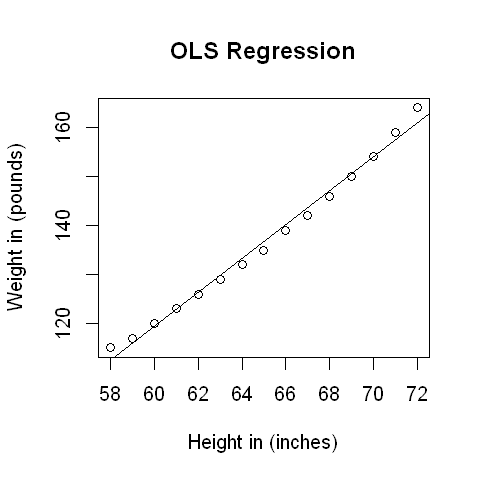

In [15]:
options(repr.plot.width=4, repr.plot.height=4)
plot(women$height,women$weight ,
     xlab = "Height in (inches)" ,
     ylab = "Weight in (pounds)" ,
     main = "OLS Regression"
    )
abline(fit)

### Ploynomial Regression 


Call:
lm(formula = weight ~ height + I(height^2), data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50941 -0.29611 -0.00941  0.28615  0.59706 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 261.87818   25.19677  10.393 2.36e-07 ***
height       -7.34832    0.77769  -9.449 6.58e-07 ***
I(height^2)   0.08306    0.00598  13.891 9.32e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3841 on 12 degrees of freedom
Multiple R-squared:  0.9995,	Adjusted R-squared:  0.9994 
F-statistic: 1.139e+04 on 2 and 12 DF,  p-value: < 2.2e-16


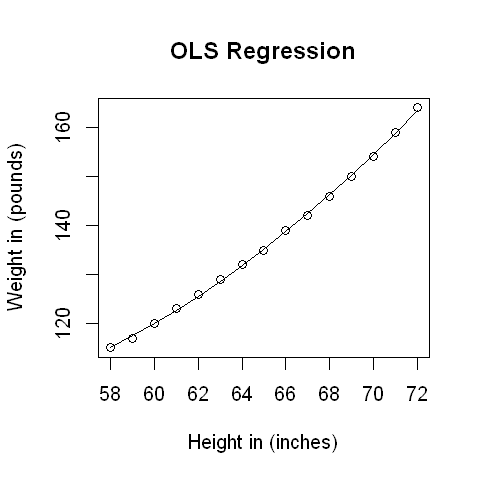

In [18]:
fit2 <- lm(weight ~ height + I(height^2), data=women)
summary(fit2)
plot(women$height,women$weight ,
     xlab = "Height in (inches)" ,
     ylab = "Weight in (pounds)" ,
     main = "OLS Regression"
    )
lines(women$height,fitted(fit2))

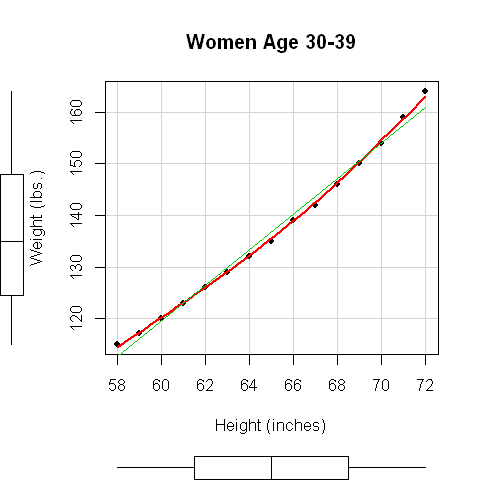

In [20]:
#scatterplot() function in the car package provides a simple and convenient method of plotting a bivariate relationship
library(car)
scatterplot(weight ~ height,
data=women,
spread=FALSE,
pch=19,
main="Women Age 30-39",
xlab="Height (inches)",
ylab="Weight (lbs.)")

This enhanced plot provides the scatter plot of weight with height, box plots for each variable in their respective margins, the linear line of best fit, and a smoothed (loess) fit line. 
* The spread=FALSE options suppress spread and asymmetry information. 
* The lty.smooth=2 option specifies that the loess fit be rendered as a dashed line. 
* The pch=19 options display points as filled circles (the default is open circles).

You can tell at a glance that the two variables are roughly symmetrical and that a curved line will fit the data points better than a straight line.

### Multiple Linear Regression with significant Interaction Term

Consider the automobile data in the mtcars data frame. Let’s say that you’re interested in the impact of automobile weight and horse power on mileage. You could fit a regression model that includes both predictors, along with their interaction

In [29]:
fit <- lm(mpg ~ hp + wt + hp:wt, data=mtcars)
summary(fit)


Call:
lm(formula = mpg ~ hp + wt + hp:wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0632 -1.6491 -0.7362  1.4211  4.5513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.80842    3.60516  13.816 5.01e-14 ***
hp          -0.12010    0.02470  -4.863 4.04e-05 ***
wt          -8.21662    1.26971  -6.471 5.20e-07 ***
hp:wt        0.02785    0.00742   3.753 0.000811 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.153 on 28 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8724 
F-statistic: 71.66 on 3 and 28 DF,  p-value: 2.981e-13


A significant interaction between two predictor variables tells you that the relationship between one predictor and the
response variable depends on the level of the other predictor.
* Here the Interaction term: hp:wt is clearly significant. 
* This means that the relationship between miles per gallon and horse power varies by car weight.

You can visualize interactions using the effect() function in the effects package. Format: plot(effect(term, mod, xlevels),
multiline=TRUE)

In [22]:
library(effects)

Warning message:
"package 'effects' was built under R version 3.4.1"
Attaching package: 'effects'

The following object is masked from 'package:car':

    Prestige



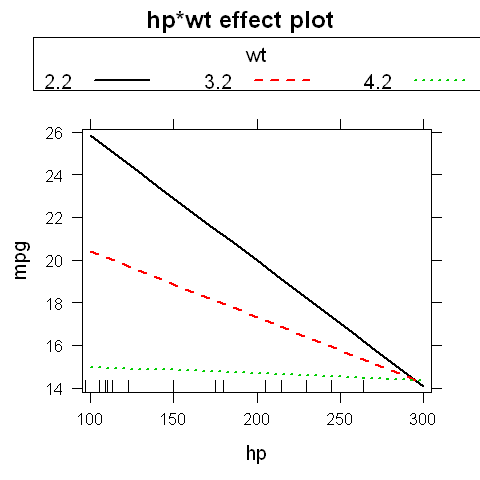

In [26]:
#This plot displays the relationship between mpg and hp at 3 values of wt.
plot(effect("hp:wt", fit, xlevels = list(wt=c(2.2,3.2,4.2))), multiline=TRUE)

You can see from this graph that as the weight of the car increases, the relationship between horse power and miles per gallon weakens

## Selecting the Best Regression Model:

When developing a regression equation, you’re implicitly faced with a selection of many possible models. Should you include all the variables under study, or drop ones that don’t make a significant contribution to prediction? Should you add polynomial
and/or interaction terms to improve the fit? The selection of a final regression model always involves a compromise between predictive accuracy (a model that fits the data as well as possible) and parsimony (a simple and replicable model). All things being equal, if you have two models with approximately equal predictive accuracy, you favor the simpler one.

### Comparing Models:
You can compare the fit of two models using:
* Anova Function: It provides a simultaneous test of whether the additional variables in the regression model add to the Prediction accuracy of the model. If the test returns insignificant, we conclude that the additional variables do not contribute to the prediction accuracy and we are justified in dropping them
* AIC Function: Alkaline Index Criterion takes into account a model's statistical fit and the number of parameters needed to achieve this fit. Models with smaller AIC values—indicating adequate fit with fewer parameters—are preferred.

Note: Although the ANOVA approach requires nested models, the AIC approach doesn’t.

In [30]:
# Building two Regression Models:
states <- as.data.frame(state.x77[,c("Murder", "Population",
                                     "Illiteracy", "Income", "Frost")])
fit1 <- lm(Murder ~ Population + Illiteracy + Income + Frost,
data=states)
fit2 <- lm(Murder ~ Population + Illiteracy, data=states)
summary(fit1)
summary(fit2)


Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08



Call:
lm(formula = Murder ~ Population + Illiteracy, data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7652 -1.6561 -0.0898  1.4570  7.6758 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.652e+00  8.101e-01   2.039  0.04713 *  
Population  2.242e-04  7.984e-05   2.808  0.00724 ** 
Illiteracy  4.081e+00  5.848e-01   6.978 8.83e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.481 on 47 degrees of freedom
Multiple R-squared:  0.5668,	Adjusted R-squared:  0.5484 
F-statistic: 30.75 on 2 and 47 DF,  p-value: 2.893e-09


In [31]:
#Comparing models using anova fit
anova(fit2, fit1)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
47,289.2457,NA,NA,NA,NA
45,289.1672,2,0.07850518,0.006108462,0.993911


Here, model 1 is nested within model 2. The anova() function provides a simultaneous test that Income and Frost add to linear prediction above and beyond Population and Illiteracy. Because the test is nonsignificant (p = .994), we conclude that they don’t add to the linear prediction and we’re justified in dropping them from our model.

In [32]:
AIC(fit1,fit2)

,df,AIC
fit1,6,241.6429
fit2,4,237.6565


The AIC values suggest that the model without Income and Frost is the better model.

### Variable selection in a Regression Model:

Comparing two models is relatively straightforward, but what do you do when there are four, or ten, or a hundred possible models to consider? In this case perform variable selection to keep our models to the minimum.

### Stepwise Regression:
In stepwise selection, variables are added to or deleted from a model one at a time, until some stopping criterion is reached. For example:
* In forward stepwise regression you add predictor variables to the model one at a time, stopping when the addition of variables would no longer improve the model. 
* In backward stepwise regression, you start with a model that includes all predictor variables, and then delete them one at a time until removing variables would degrade the quality of the model. 
* In stepwise stepwise regression, you combine the forward and backward stepwise approaches. 
    * Variables are entered one at a time, but at each step, the variables in the model are reevaluated, and those that don’t contribute to the model are deleted.
    * A predictor variable may be added to, and deleted from, a model several times before a final solution is reached.
    * The implementation of stepwise regression methods vary by the criteria used to enter or remove variables. 
    * The stepAIC() function in the MASS package performs stepwise model selection (forward, backward, stepwise) using an exact AIC criterion.

In [33]:
library(MASS)

In [35]:
#Backward Stepwise selection:
fit1 <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
stepAIC(fit1, direction="backward")

Start:  AIC=97.75
Murder ~ Population + Illiteracy + Income + Frost

             Df Sum of Sq    RSS     AIC
- Frost       1     0.021 289.19  95.753
- Income      1     0.057 289.22  95.759
<none>                    289.17  97.749
- Population  1    39.238 328.41 102.111
- Illiteracy  1   144.264 433.43 115.986

Step:  AIC=95.75
Murder ~ Population + Illiteracy + Income

             Df Sum of Sq    RSS     AIC
- Income      1     0.057 289.25  93.763
<none>                    289.19  95.753
- Population  1    43.658 332.85 100.783
- Illiteracy  1   236.196 525.38 123.605

Step:  AIC=93.76
Murder ~ Population + Illiteracy

             Df Sum of Sq    RSS     AIC
<none>                    289.25  93.763
- Population  1    48.517 337.76  99.516
- Illiteracy  1   299.646 588.89 127.311



Call:
lm(formula = Murder ~ Population + Illiteracy, data = states)

Coefficients:
(Intercept)   Population   Illiteracy  
  1.6515497    0.0002242    4.0807366  


You start with all four predictors in the model. For each step, the AIC column provides the model AIC resulting from the deletion of the variable listed in that row. The AIC value for <none> is the model AIC if no variables are removed. In the first step, Frost is removed, decreasing the AIC from 97.75 to 95.75. In the second step, Income is removed, decreasing the AIC to 93.76. Deleting any more variables would increase the AIC, so the process stops.

In [38]:
#Backward Stepwise selection:
fit1 <- lm(Murder ~ Population + Illiteracy + Income + Frost, data=states)
stepAIC(fit1, direction="backward")

Start:  AIC=97.75
Murder ~ Population + Illiteracy + Income + Frost

             Df Sum of Sq    RSS     AIC
- Frost       1     0.021 289.19  95.753
- Income      1     0.057 289.22  95.759
<none>                    289.17  97.749
- Population  1    39.238 328.41 102.111
- Illiteracy  1   144.264 433.43 115.986

Step:  AIC=95.75
Murder ~ Population + Illiteracy + Income

             Df Sum of Sq    RSS     AIC
- Income      1     0.057 289.25  93.763
<none>                    289.19  95.753
- Population  1    43.658 332.85 100.783
- Illiteracy  1   236.196 525.38 123.605

Step:  AIC=93.76
Murder ~ Population + Illiteracy

             Df Sum of Sq    RSS     AIC
<none>                    289.25  93.763
- Population  1    48.517 337.76  99.516
- Illiteracy  1   299.646 588.89 127.311



Call:
lm(formula = Murder ~ Population + Illiteracy, data = states)

Coefficients:
(Intercept)   Population   Illiteracy  
  1.6515497    0.0002242    4.0807366  


In [40]:
#Stepwise - Forward selection backward elimination

#Null Model
noModel <- lm(Murder ~ 1,data = states)

#Full Model
RegModelFull = lm(Murder ~ ., data = states)

#Stepwise - Forward selection backward elimination
RegModelStepwise <- stepAIC(noModel, list(lower = formula(noModel),
                                         upper = formula(RegModelFull)),
                           direction = "both", trace = 0)
#Model Evaluation:
summary(RegModelStepwise)


Call:
lm(formula = Murder ~ Illiteracy + Population, data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7652 -1.6561 -0.0898  1.4570  7.6758 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.652e+00  8.101e-01   2.039  0.04713 *  
Illiteracy  4.081e+00  5.848e-01   6.978 8.83e-09 ***
Population  2.242e-04  7.984e-05   2.808  0.00724 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.481 on 47 degrees of freedom
Multiple R-squared:  0.5668,	Adjusted R-squared:  0.5484 
F-statistic: 30.75 on 2 and 47 DF,  p-value: 2.893e-09


### All Subsets Regression:
Stepwise regression is controversial. Although it may find a good model, there’s no guarantee that it will find the best model. This is because not every possible model is evaluated. All Subsets Regression overcomes this limitation.

In all subsets regression, every possible model is inspected. The analyst can choose to have all possible results displayed, or ask for the nbest models of each subset size (one] predictor, two predictors, etc.). For example, if nbest=2, the two best one-predictor models are displayed, followed by the two best two-predictor models, followed by the two best three-predictor models, up to a model with all predictors. 

All subsets regression is performed using the regsubsets() function from the leaps package. You can choose 
R-squared, Adjusted R-squared, or Mallows Cp statistic as your criterion for reporting “best” models. 

As you’ve seen, R-squared is the amount of variance accounted for in the response variable by the predictors variables. Adjusted R-squared is similar, but takes into account the number of parameters in the model. R-squared always increases with the addition of predictors. When the number of predictors is large compared to the sample size, this can lead to significant overfitting. The Adjusted R-squared is an attempt to provide a more honest estimate of the population R-squared—one that’s less likely to take advantage of chance variation in the data. The Mallows Cp statistic is also used as a stopping rule in stepwise regression. It has been widely suggested that a good model is one in which the Cp statistic is close to the number of model parameters (including the intercept).

In [42]:
library(leaps)

Warning message:
"package 'leaps' was built under R version 3.4.1"

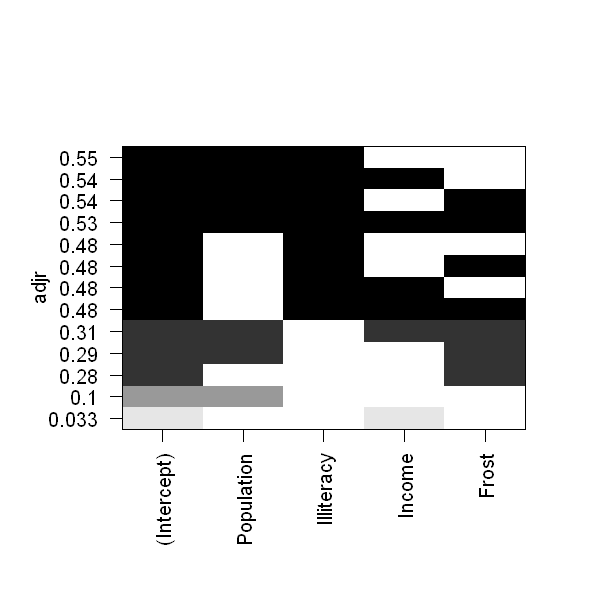

In [49]:
options(repr.plot.width=5, repr.plot.height=5)
leaps <-regsubsets(Murder ~ Population + Illiteracy + Income + Frost, data=states, nbest=4)
plot(leaps, scale="adjr")

Looking at the first row (starting at the bottom), you can see that a model with the intercept and Income has an adjusted R-square of 0.33. A model with the intercept and Population has an adjusted R-square of 0.1. Jumping to the 12th row, you see that a model with the intercept, Population, Illiteracy, and Income has an adjusted R-square of 0.54, whereas one with the intercept, Population, and Illiteracy alone has an adjusted R-square of 0.55. Here you see that a model with fewer predictors has a larger adjusted R-square (something that can’t happen with an unadjusted R-square). The graph suggests that the two-predictor model (Population and Illiteracy) is the best.